## Task 3: Build a Decision Tree Classifier and Visualize it graphically.

### Name: Rahul Singh

### Domain: Data Science & Business Analytics

### Problem Statement: To create the Decision Tree Classifier and visualize it graphically.

#### Dataset: https://bit.ly/3kXTdox

In [1]:
# Filtering the warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Importing relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#### Reading and Understanding the data

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [4]:
# Importing the data
data= pd.read_csv('/content/gdrive/MyDrive/Iris.csv')
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
#Checking the shape of dataset
data.shape

(150, 6)

In [6]:
#Checking the basic information of data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


Insights: There are total 5 columns and no missing values in any column.

In [7]:
#Checking the statistical information of data
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


#### Data Visualization

In [8]:
#Columns of dataset
data.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

#### Univariate Analysis

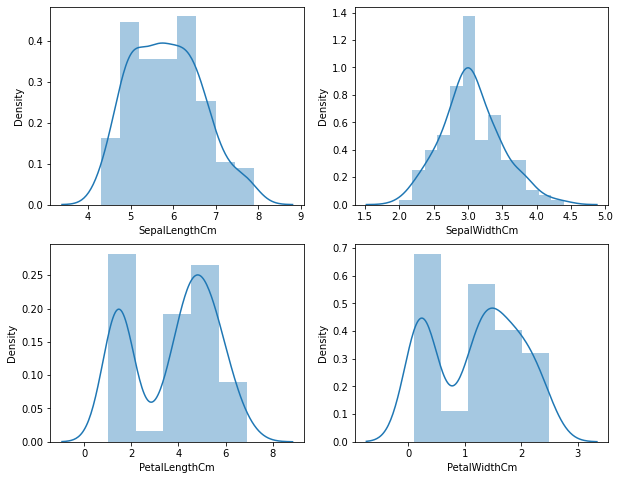

In [9]:
#Plotting the uni-variate analysis of following columns
col= ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']

plt.figure(figsize=(10,8))
plt.subplot(2,2,1)
sns.distplot(data[col[0]])

plt.subplot(2,2,2)
sns.distplot(data[col[1]])

plt.subplot(2,2,3)
sns.distplot(data[col[2]])

plt.subplot(2,2,4)
sns.distplot(data[col[3]])

plt.show()

Insights: The range of columns are different however, for Decision Tree classifier scaling is not mandatory.

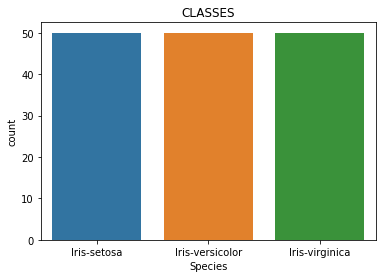

In [10]:
#Plotting the classes 
plt.figure(figsize=(6,4))
sns.countplot(data['Species'])
plt.title("CLASSES")
plt.show()

In [11]:
#Calculating the value counts 
data['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

Bivariate Analysis

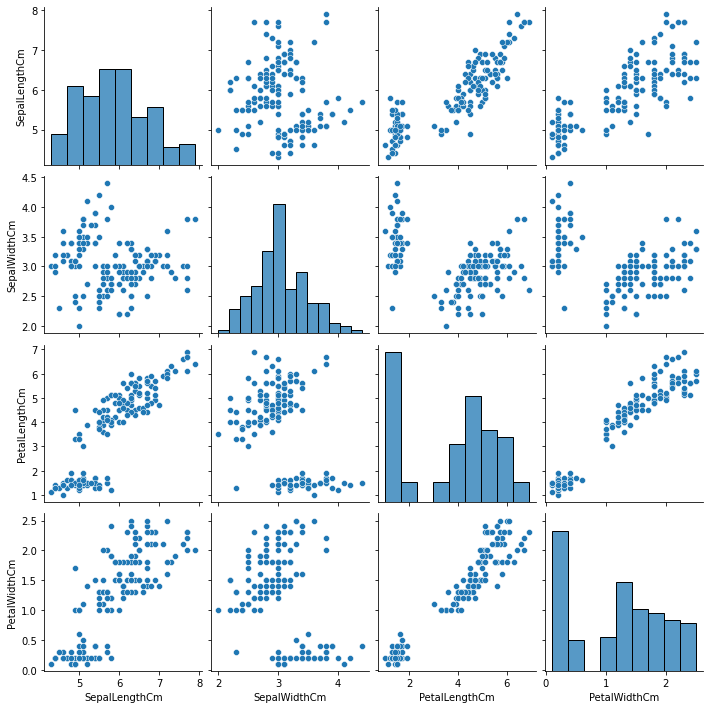

In [12]:
#Plotting the relationship between columns
sns.pairplot(data[col])
plt.show()

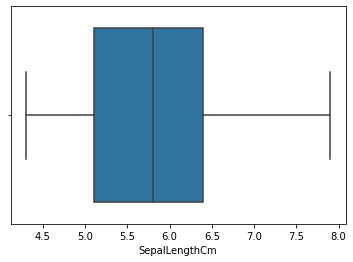

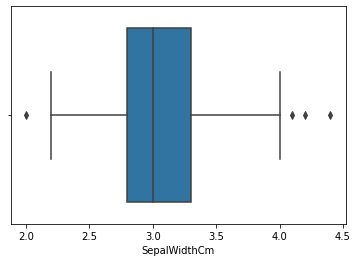

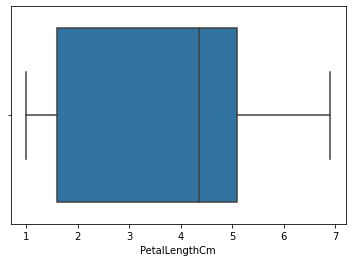

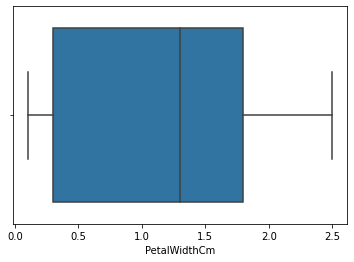

In [13]:
for c in col:
  sns.boxplot(data[c])
  plt.show()

#### Data preprocessing for model building

In [14]:

data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [15]:
#Creating the dataset without id column
data_m= data[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm', 'Species']]
data_m.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [16]:
data['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [17]:
#Encoding the categorical column
data_m['Species']= data_m['Species'].map({'Iris-setosa': 0, 'Iris-virginica': 1, 'Iris-versicolor': 2})
data_m.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [18]:
data_m['Species'].value_counts()

2    50
1    50
0    50
Name: Species, dtype: int64

In [19]:
#Creating dependent and independent data sets
y= data_m['Species']
X= data_m.drop('Species', axis=1)

In [20]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Species, dtype: int64

In [21]:
X.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [22]:
#Splitting the dataset into training and test dataset.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.25, random_state=17)

In [23]:
#Checking the shape of X_train
X_train.shape

(112, 4)

In [24]:
#Checking the shape of X_test
X_test.shape

(38, 4)

In [25]:
#Checking the shape of y_train
y_train.shape

(112,)

In [26]:
#Checking the shape of y_test
y_test.shape

(38,)

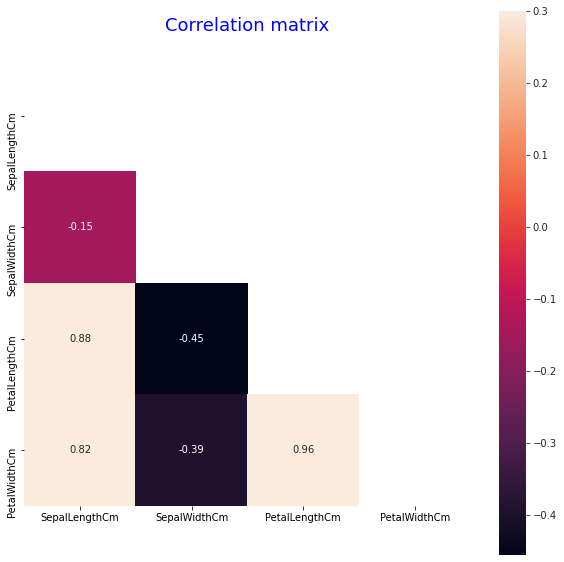

In [27]:
# Plotting a heat map 
corr = X_train.corr()
title = "Correlation matrix"
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(10, 10))
plt.title(title, fontsize = 18, color="Blue")
ttl = ax.title
ttl.set_position([0.5,1.05])
with sns.axes_style("white"):
    ax = sns.heatmap(corr, annot=True, mask=mask, vmax=.3, square=True);

In [28]:
#Removing the 'PetalLength' column due to high correlation
col=['SepalLengthCm', 'PetalWidthCm', 'SepalWidthCm']

In [29]:
#Importing relevant libraries for Decision tree classifiers and metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [30]:
# Creating helper functions to evaluate model performance and help plot the decision tree
# Importing required packages for visualization
from IPython.display import Image  
from six import StringIO  
from sklearn.tree import export_graphviz
import pydotplus


def evaluate_train_model():
    print("Train")
    print('confusion_matrix: ', confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))
    print("Accuracy Score : ", accuracy_score(y_train, y_train_pred))
    

def evaluate_test_model():
    print("Test")
    print('confusion_matrix: ', confusion_matrix(y_test, y_test_pred))
    print(classification_report(y_test, y_test_pred))
    print("Accuracy Score : ", accuracy_score(y_test, y_test_pred))
    

In [31]:
#Creating the classifier object and fitting it on data set
tree_clf= DecisionTreeClassifier(random_state=17, max_depth=3)
tree_clf.fit(X_train[col], y_train)

#Making predictions on traning as well as test data set
y_train_pred= tree_clf.predict(X_train[col])


In [32]:
#Evaluating the Training model
evaluate_train_model()

Train
confusion_matrix:  [[40  0  0]
 [ 0 34  3]
 [ 0  1 34]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           1       0.97      0.92      0.94        37
           2       0.92      0.97      0.94        35

    accuracy                           0.96       112
   macro avg       0.96      0.96      0.96       112
weighted avg       0.97      0.96      0.96       112

Accuracy Score :  0.9642857142857143


### The Accuracy score for training set is approximately 96.4 %

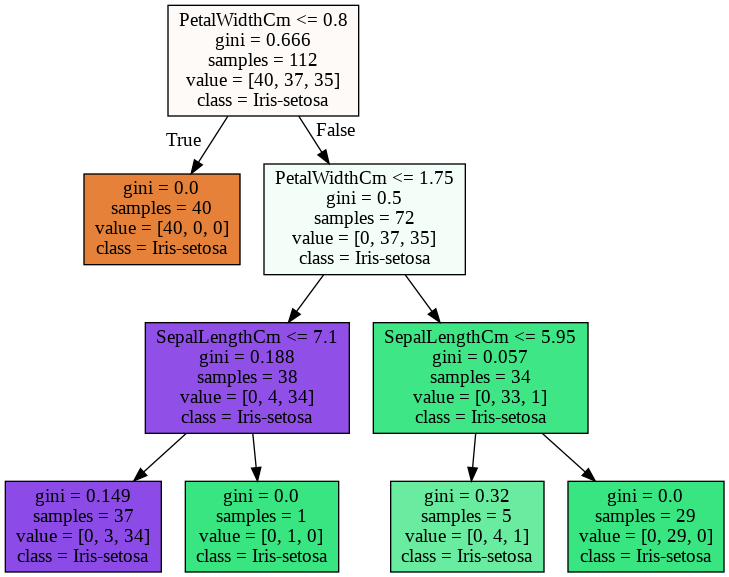

<Figure size 1800x1440 with 0 Axes>

In [33]:
#Plotting the Decision Tree
fig = plt.figure(figsize=(25,20))
dot_data = StringIO()
export_graphviz(tree_clf, out_file=dot_data, feature_names=X_train[col].columns,
                class_names= data['Species'].values, filled=True)


# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())


### Prediction on Test Dataset

In [34]:
y_test_pred= tree_clf.predict(X_test[col])

In [35]:
#Evaluating the Test dataset
evaluate_test_model()

Test
confusion_matrix:  [[10  0  0]
 [ 0 12  1]
 [ 0  0 15]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.92      0.96        13
           2       0.94      1.00      0.97        15

    accuracy                           0.97        38
   macro avg       0.98      0.97      0.98        38
weighted avg       0.98      0.97      0.97        38

Accuracy Score :  0.9736842105263158


### The Accuracy score for Test dataset is approximately 97.4 %

## Thank You